<a href="https://colab.research.google.com/github/Shobhitha-B/cowcareai/blob/main/bcs_ai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd

# Create a sample DataFrame
data = {
    'image_path': ['/content/omafra-body-condition-scoring-of-dairy-cattle-figure-10-354x354-2020-06-09-v1.jpg',
                   '/content/omafra-body-condition-scoring-of-dairy-cattle-figure-14-354x354-2020-06-09-v1.jpg',
                   '/content/omafra-body-condition-scoring-of-dairy-cattle-figure-18-354x354-2020-06-09-v1.jpg',
                   '/content/omafra-body-condition-scoring-of-dairy-cattle-figure-22-354x354-2020-06-09-v1.jpg',
                   '/content/omafra-body-condition-scoring-of-dairy-cattle-figure-6-354x354-2020-06-09-v1.jpg'],
    'bcs': [1.0,2.0,3.0,4.0,5.0]}

df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
df.to_csv('bcs_data.csv', index=False)

In [41]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [42]:
# Load the BCS data
data = pd.read_csv('bcs_data.csv')

# Initialize lists to hold features and labels
features = []
labels = []

# Process each image
for index, row in data.iterrows():
    image_path = row['image_path']  # Path to the image
    bcs_value = row['bcs']           # Corresponding BCS value

    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Resize to a fixed size
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    features.append(image.flatten())  # Flatten the image to a 1D array
    labels.append(bcs_value)

# Convert to numpy arrays
X = np.array(features)
y = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Create and train the Linear Regression model
lrm = LinearRegression()
lrm.fit(X_train, y_train)

# Predict on the test set
y_pred_lrm = lrm.predict(X_test)

# Calculate Mean Squared Error for LRM
mse_lrm = mean_squared_error(y_test, y_pred_lrm)
print(f'Mean Squared Error for Linear Regression: {mse_lrm}')

Mean Squared Error for Linear Regression: 1.8255835272941618


In [44]:
# Scale the features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='rbf')  # Radial basis function kernel
svr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svr = svr.predict(X_test_scaled)

# Calculate Mean Squared Error for SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'Mean Squared Error for Support Vector Regression: {mse_svr}')

Mean Squared Error for Support Vector Regression: 2.1381388410701994


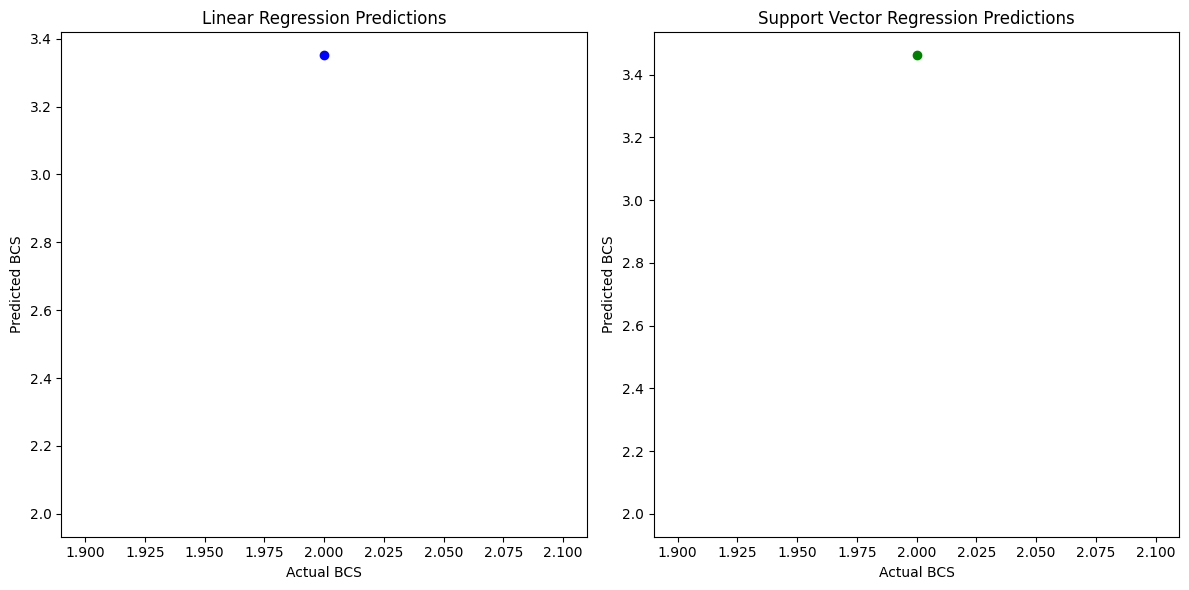

In [45]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Linear Regression results
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lrm, color='blue')
plt.title('Linear Regression Predictions')
plt.xlabel('Actual BCS')
plt.ylabel('Predicted BCS')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line

# SVR results
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_svr, color='green')
plt.title('Support Vector Regression Predictions')
plt.xlabel('Actual BCS')
plt.ylabel('Predicted BCS')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line

plt.tight_layout()
plt.show()

In [76]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/omafra-body-condition-scoring-of-dairy-cattle-figure-14-354x354-2020-06-09-v1.jpg')

# Resize the image
image_resized = cv2.resize(image, (224, 224))

# Normalize pixel values
image_normalized = image_resized / 255.0

In [77]:
# Example of extracting points (this will depend on your specific feature extraction method)
# Assume `points` is a list of (x, y) coordinates extracted from the image
# Replace with actual points extracted from your image processing
# Example points:
x1, y1 = 10, 20  # Example values, replace with your actual extracted points
x2, y2 = 30, 40  # Example values, replace with your actual extracted points

points = np.array([[x1, y1], [x2, y2]])

# Fit a parabolic model (y = ax^2 + bx + c)
coefficients = np.polyfit(points[:, 0], points[:, 1], 2)  # 2 for quadratic
parabola = np.poly1d(coefficients)

<ipython-input-77-1030481d558b>:11: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(points[:, 0], points[:, 1], 2)  # 2 for quadratic


In [78]:
# Example of extracting points (this will depend on your specific feature extraction method)
# Assume `points` is a list of (x, y) coordinates extracted from the image
# Replace with actual points extracted from your image processing
# Example points:
x1, y1 = 10, 20  # Example values, replace with your actual extracted points
x2, y2 = 30, 40  # Example values, replace with your actual extracted points

points = np.array([[x1, y1], [x2, y2]])

# Fit a parabolic model (y = ax^2 + bx + c)
coefficients = np.polyfit(points[:, 0], points[:, 1], 2)  # 2 for quadratic
parabola = np.poly1d(coefficients)

# Calculate the average x-coordinate from your extracted points
average_x = np.mean(points[:, 0])  # Calculate average x from points

# Predict BCS based on the parabola
predicted_bcs = parabola(average_x)

# Scale the prediction to be between 1 and 5
predicted_bcs_scaled = np.clip(predicted_bcs, 5, 1)
print(f"Predicted BCS: {predicted_bcs_scaled}")

Predicted BCS: 1.0


<ipython-input-78-86675bd334d7>:11: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(points[:, 0], points[:, 1], 2)  # 2 for quadratic


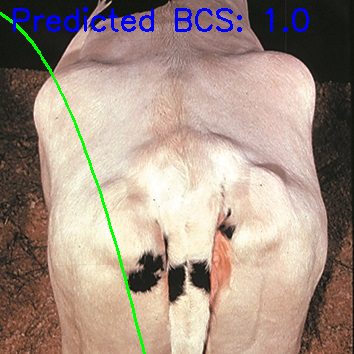

In [75]:
# Create a copy of the original image for drawing
image_with_parabola = image.copy()

# Generate x values for the parabola
x_values = np.linspace(0, image.shape[1], num=100)
y_values = parabola(x_values)

# Draw the parabola on the image
for i in range(len(x_values) - 1):
    cv2.line(image_with_parabola, (int(x_values[i]), int(y_values[i])),
             (int(x_values[i + 1]), int(y_values[i + 1])), (0, 255, 0), 2)

# Annotate the image with the predicted BCS
cv2.putText(image_with_parabola, f'Predicted BCS: {predicted_bcs_scaled}',
            (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Display the image using cv2_imshow from google.colab.patches
from google.colab.patches import cv2_imshow  # Import cv2_imshow
cv2_imshow(image_with_parabola) # Use cv2_imshow instead of cv2.imshow
#cv2.waitKey(0) # Not needed in Colab
#cv2.destroyAllWindows() # Not needed in Colab